# Motivation
Modeling the sale price of a home could be valuable for multiple reasons:
- To a real estate investor, understanding the future value of a property can guide purchasing strategies.
- To a home buyer, a model could help inform them which house, in a set of potential purchases, is reasonably priced.
- From the perspective of a governing entity, understanding the determinants of sales price can inform policy that seeks to create affordable housing or highlight and respond to volatility in housing markets.

# Overview
In this assignment, we will apply linear regression, polynomial regression, and
regularization techniques to predict the sale price of houses. The [dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) we use contains a rich set of features: 79 explanatory variables describing various  aspects of residential homes in Ames, Iowa.


# Goals

1) Predict the sales price of a home using a real-world dataset

2) Use regularization to avoid overfitting and improve model performance

3) Explain how machine learning help us better understand variation in housing prices


In [112]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Exploratory Data Analysis (EDA)

In [113]:
# Import data and check basic information
# Note: please use the dataset we provided on Canvas, do not use the one posted on Kaggle
df = pd.read_csv('house_data.csv')
df.shape

(2919, 81)

In [114]:
# View variables
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [115]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


## Explore target variable

The variable: SalePrice - the property's sale price in dollars

The aim here is to better understand our target and verify its integrity. We will look at some summary statistics, empirical distribution and missing values.

In [116]:
print(df.SalePrice.describe()) # Look at summary statistics
print()
print("Number of missing values: {}".format(df.SalePrice.isna().sum()))
print("Proportion of missing values: {:.4f}".format(df.SalePrice.isna().sum()/len(df)))

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Number of missing values: 1459
Proportion of missing values: 0.4998


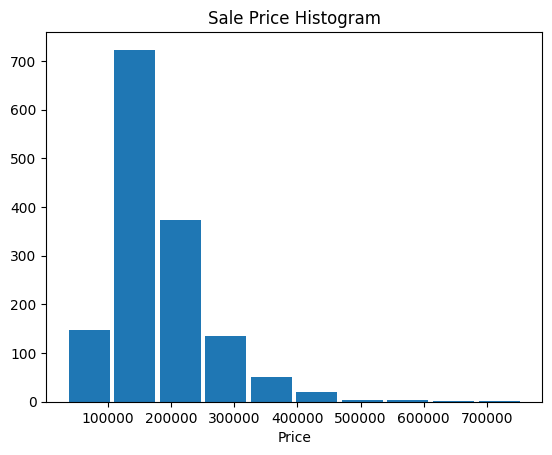

In [117]:
# Visualize the distribution
plt.hist(df.SalePrice, rwidth=0.9)
plt.xlabel('Price')
plt.title('Sale Price Histogram');

We gain some helpful informatino from all of this:
- First, we see that there are a significant amount of missing values -- we need to deal with these.
- Furthermore, we see that there are outliers on the upper end of the distribution, i.e., some houses are sold for extremely high prices.

Shape of data before dropping: (2919, 81)
Shape of data after dropping: (1460, 81)



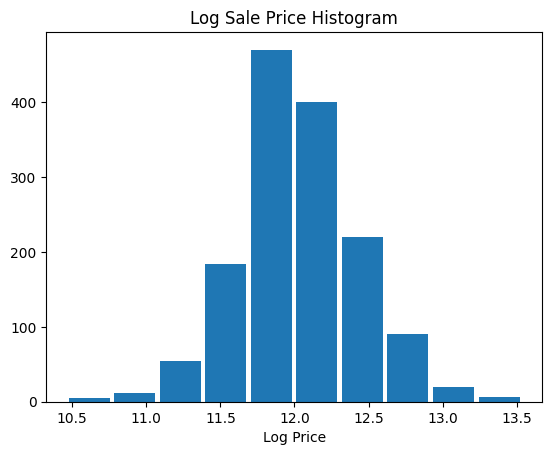

In [118]:
# Drop missing values
print('Shape of data before dropping: {}'.format(df.shape))
df_clean = df.drop(df[df['SalePrice'].isna()].index, axis=0)
print('Shape of data after dropping: {}'.format(df_clean.shape))
print()

# Data transformation: take log of the target variable, to reduce the range of the prices
df_clean['lg_SalePrice'] = np.log(df['SalePrice'])

# Visualize the transformed distribution
plt.hist(df_clean.lg_SalePrice, rwidth=0.9)
plt.xlabel('Log Price')
plt.title('Log Sale Price Histogram');

## Explore feature variables

We will now apply a similar approach to explore our features:

1) Check for and deal with missing values

2) Determine feature types

3) Clean features based on their type



## Missing values

In [119]:
# Check missing values
null_perct = df_clean.isna().sum()/len(df_clean)
null_perct[null_perct>0]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [120]:
# Note that some features have a large portion of missing observations (e.g., PoolQC).
# In response, we will drop columns that have more than 30% missing values.
# Recall that there are other potential ways to deal with missing values, such as imputation, but this is not the focus of this assignment.

print(df_clean.shape)
df_clean = df_clean.drop(columns=df_clean.columns[null_perct > 0.3])
print(df_clean.shape)

# feature size reduced from 82 to 77

(1460, 82)
(1460, 77)


In [121]:
# Next, we will drop samples with any remaining missing values.
print(df_clean.shape)
df_final = df_clean.dropna().reset_index(drop=True)
print(df_final.shape)

# sample size reduced from 1460 to 1094

(1460, 77)
(1094, 77)


## Explore feature types

What kind of feature types do we have? Organize features into types.

### Begin with numeric variables

In [122]:
# Identify numeric types
df_final.select_dtypes(['int', 'float']).dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
lg_SalePrice     float64
dtype: object

In [123]:
# Generate descriptive statistics for numeric variables
df_final.select_dtypes(['int', 'float']).describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,lg_SalePrice
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,727.375686,56.128885,70.759598,10132.346435,6.247715,5.575868,1972.412249,1985.915905,109.855576,448.191956,...,46.946984,22.053016,3.266910,16.498172,3.007313,23.550274,6.335466,2007.786106,187033.263254,12.057513
std,420.955488,41.976345,24.508859,8212.249621,1.366797,1.066500,31.189752,20.930772,190.667459,468.728095,...,64.820019,61.570502,29.655973,58.455303,40.713175,167.135237,2.694558,1.334307,83165.332151,0.394847
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000,10.471950
25%,366.500000,20.000000,60.000000,7606.750000,5.000000,5.000000,1953.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,132500.000000,11.794338
50%,723.500000,50.000000,70.000000,9444.500000,6.000000,5.000000,1975.000000,1995.000000,0.000000,384.500000,...,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165750.000000,12.018235
75%,1093.750000,70.000000,80.000000,11387.250000,7.000000,6.000000,2003.000000,2005.000000,171.750000,712.750000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,221000.000000,12.305918
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000,13.534473


Note that we have both integer (e.g., YearBuilt, YrSold) and float (e.g., LotFrontage) variables.

While there are some integers such as MSSubClas, that one may want to treat differently, perhaps by one-hot encoding, here we will let them enter the regression as integer features.

In [124]:
# Collect numeric features to be included in later analysis
all_num_cols = df_final.select_dtypes(['int', 'float']).columns
num_cols = all_num_cols[1:len(all_num_cols)-2] # Collect numeric features, exclude ID and target variable
df_num = df_final[num_cols] # Exclude ID and target variable
print(df_num.shape)

(1094, 36)


### Check text/string variables

In [125]:
# Pandas strings
df_final.select_dtypes(['object']).dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [126]:
# Tabulate variables to better understand their content
for col in df_final.select_dtypes(['object']).columns:
    print(df_final[col].value_counts(),'\n')

RL         850
RM         173
FV          54
RH           9
C (all)      8
Name: MSZoning, dtype: int64 

Pave    1090
Grvl       4
Name: Street, dtype: int64 

Reg    760
IR1    301
IR2     26
IR3      7
Name: LotShape, dtype: int64 

Lvl    991
Bnk     45
HLS     44
Low     14
Name: LandContour, dtype: int64 

AllPub    1094
Name: Utilities, dtype: int64 

Inside     830
Corner     187
CulDSac     44
FR2         29
FR3          4
Name: LotConfig, dtype: int64 

Gtl    1045
Mod      44
Sev       5
Name: LandSlope, dtype: int64 

NAmes      173
CollgCr    122
OldTown     96
Somerst     75
NridgHt     74
Edwards     65
Gilbert     49
NWAmes      45
Sawyer      44
SawyerW     44
BrkSide     42
Crawfor     41
NoRidge     33
Mitchel     30
Timber      29
IDOTRR      27
StoneBr     20
SWISU       19
BrDale      15
Blmngtn     14
ClearCr     11
MeadowV     10
Veenker      7
NPkVill      7
Blueste      2
Name: Neighborhood, dtype: int64 

Norm      950
Feedr      52
Artery     42
RRAn       2

We see that these variables are categorical in nature. The next step will be to engineer these into many indicator variables using sklearn.preprocessing's OneHotEncoder.

In [127]:
# Collect text (i.e., object) variables
text_cols = df_final.select_dtypes(['object']).columns.to_list()

# Initiate OHE instance
ohe = OneHotEncoder(handle_unknown='ignore', drop='first', dtype = np.int64) # Set drop to 'first' to aviod collinearity

# Fit OHE to the categorical features
ohe.fit(df_final[text_cols])

OneHotEncoder(drop='first', dtype=<class 'numpy.int64'>,
              handle_unknown='ignore')

In [128]:
# View categories
ohe.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['AllPub'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRNn'], dtype=object),
 array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object),
 array(['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story',
      

In [129]:
# Note: Many of the original features contain similar values.
# we will relabel these as FeatureName_value to make it self-explainable
new_col_names = []
index = 0
for arr, col_name in zip(ohe.categories_, text_cols):
    for ele in arr[1:]: # Skipping the first value label because our OHE model is set to drop the first feature value
        new_col_name = col_name + '_' + ele.strip(' ')
        new_col_names.append(new_col_name)

# Create dataset of binary features
df_ohe = pd.DataFrame(ohe.transform(df_final[text_cols]).toarray(), columns=new_col_names)
print(df_ohe.shape)

(1094, 185)


# Finalize feature matrix and target variable, and create train-test split

In [130]:
# Create feature matrix by concatenating numeric and OHE dataframe
df_X = pd.concat([df_num, df_ohe], axis = 1)
feature_names = df_X.columns.to_list()
df_X.shape

(1094, 221)

In [131]:
# Create target variable
target = 'lg_SalePrice'
df_y = df_final[[target]]
df_y.shape

(1094, 1)

In [132]:
# Split data into train/test set
df_X_train, df_X_test, df_y_train, df_y_test  = train_test_split(df_X, df_y, test_size = 0.3, random_state = 42)

df_X_train.shape, df_X_test.shape
# created 765 training samples and 329 testing samples, each sample is represented with 221 features

((765, 221), (329, 221))

# Finally... regression time

In this subsection we will train and test the following models:

i) Linear Regression

ii) Polynomial Regression

iii) Lasso Regression (with L1 regularization)

iv) Ridge Regression (with L2 regularization)



## Linear Regression

Fit the linear regression model on the training set and evaluate model performance on the testing set (use the *score* function)
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [133]:
# Fit on the training data
reg = LinearRegression().fit(df_X_train, df_y_train)

# Evaluate
reg.score(df_X_test, df_y_test).round(3)

0.762

**Check the model coefficients and intercept**

- What are the largest positive and negative coefficients?
- Commnet on some feature-coefficients in the context of the value of a house. Are they what you would expect?

Refer to the [data fields on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) to get more info of each feature. Remember, the OHE features are named according to the following schema: *FeatureName_value*

In [134]:
df_linear_coef = pd.DataFrame({'features':reg.feature_names_in_, 'coefficients':np.round(reg.coef_[0],3)})

display(df_linear_coef.sort_values(['coefficients'], ascending=False).iloc[:10])
print()
display(df_linear_coef.sort_values(['coefficients'], ascending=True).iloc[:10])

,features,coefficients
106,RoofMatl_Membran,3.230
110,RoofMatl_WdShngl,2.756
108,RoofMatl_Tar&Grv,2.735
105,RoofMatl_CompShg,2.648
109,RoofMatl_WdShake,2.447
37,MSZoning_RH,0.465
36,MSZoning_FV,0.432
39,MSZoning_RM,0.390
38,MSZoning_RL,0.369
128,Exterior2nd_CmentBd,0.318


,features,coefficients
88,Condition2_PosN,-0.882
200,GarageQual_Po,-0.269
114,Exterior1st_CemntBd,-0.218
198,GarageQual_Fa,-0.212
62,Neighborhood_MeadowV,-0.198
186,Functional_Maj2,-0.194
52,LandSlope_Sev,-0.193
199,GarageQual_Gd,-0.192
201,GarageQual_TA,-0.177
176,HeatingQC_Po,-0.176


+ The largest positive coefficients are for the features related to the type of roofing material:
 + RoofMatl_Membran: 3.230
 + RoofMatl_WdShngl: 2.756
 + RoofMatl_Tar&Grv: 2.735
 + RoofMatl_CompShg: 2.648
 + RoofMatl_WdShake: 2.447
+ The largest negative coefficient is for the feature:
 + Condition2_PosN: -0.882
 + GarageQual_Po: -0.269

+ The roofing material features have the highest positive coefficients, indicating that these materials are associated with higher house values. This might be expected as certain roofing materials like membrane or wood shingles are typically more expensive and may be indicative of a higher overall quality of construction or luxury status.
+ The MSZoning features also have positive coefficients, but they are much lower than those for roofing materials. These features represent different zoning classifications of the property, like RH (Residential High Density), FV (Floating Village Residential), and RL (Residential Low Density). The positive coefficients suggest that houses in these zoning areas are priced higher, which might correspond to the desirability of the neighborhood, local amenities, or other location-related factors.

## Polynomial regression

Let's now add some new polynomial features constructed from our numerical features
- Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
- Note that we are using the same training and testing dataset from the above steps

**First**, we will pick some numerical features to do polynomial transformation on the **training data**

In [135]:
# We will apply the polynomial transform to our float variables
poly_cols = df_X_train.select_dtypes(['float']).columns

In [136]:
# We start with second degree polynomial features
poly2 = PolynomialFeatures(degree=2, include_bias=True)

# Fit and transform selected features of traning data to polynomial representation
poly2_features_train = pd.DataFrame(poly2.fit_transform(df_X_train[poly_cols]),
                                    columns = poly2.get_feature_names_out(poly_cols))


In [137]:
# Add the ploynomial features to the other remaining features in our training data
# Exclude ~ original selected columns that are contained in poly2_features_train
poly2_train = pd.concat([df_X_train.loc[:,  ~df_X_train.columns.isin(poly_cols)].reset_index(),
                         poly2_features_train], axis=1)

# Set index back to the original train data (when created, poly2_features_train has its indexed reset)
poly2_train = poly2_train.set_index(['index'])

poly2_train.shape

(765, 288)

**Think about why** do we do reset_index() and set_index(['indes']) in the above code?

+ reset_index() is used to simplify the DataFrame index to allow easy concatenation of the new polynomial features with the original features.

+ set_index(['index']) is then used to re-align the new concatenated DataFrame with the original DataFrame's indexing system. This ensures that the new features are correctly associated with the corresponding entries from the original dataset (and there might be some important info in the index)

**Second**, we will apply the polynomial transformation to those selected features on the **testing data**
- **think about why** we do "fit_transform" on training data but only do "transform" on testing data?


We apply 'fit_transform' to the training data because this process both calculates the necessary transformation parameters and then applies them to the training data, which is essential for building the model. In contrast, we only use 'transform' on the testing data because the testing set should be subjected to the same transformation parameters established by the training set, not its own. This ensures that the model is evaluated on a consistent basis. If we were to use 'fit_transform' on the testing data, it would lead to an incorrect assessment of the model’s performance, potentially inflating the model's metrics due to it being influenced by the specifics of the test set, which is not indicative of its performance on unseen data.

In [138]:
# Transform on test data

poly2_features_test = pd.DataFrame(poly2.transform(df_X_test[poly_cols]),
                                   columns = poly2.get_feature_names_out(poly_cols))

# Add the ploynomial features to the other remaining features in our testing data
# Exclude ~ original selected columns that are contained in poly2_features_train
poly2_test = pd.concat([df_X_test.loc[:,  ~df_X_test.columns.isin(poly_cols)].reset_index(),
                        poly2_features_test],axis=1)

# Set index back to the original train data (when created, poly2_features_train has its indexed reset)
poly2_test = poly2_test.set_index(['index'])

poly2_test.shape

(329, 288)

**Third**, we will fit and evaluate the regression model with the newly generated polynomial feature matrix

In [139]:
# fit a regression model with the newly generated polynomial training feature matrix
poly2_reg = LinearRegression().fit(poly2_train, df_y_train)

# evaluate model performance on the polynomial testing feature matrix
poly2_reg.score(poly2_test, df_y_test).round(3)

0.872

Note the **test score improvment**! Presumably, our more complex model has learned to explain more variation in sales price that is generalizable to test data.

Let's see what happens if we do polynomial degree=3.

## Your task:  implement polynomial degree=3
- please follow the above logics of degree=2 to write your own code for degree=3

**First**, do polynomial transformation on the poly_cols of the **training data**

In [140]:
poly_cols = df_X_train.select_dtypes(['float']).columns
poly3 = PolynomialFeatures(degree=3, include_bias=True)

# Fit and transform selected features of traning data to polynomial representation
poly3_features_train = pd.DataFrame(poly3.fit_transform(df_X_train[poly_cols]),
                                    columns = poly3.get_feature_names_out(poly_cols))


In [141]:
# Add the ploynomial features to the other remaining features in our training data
# Exclude ~ original selected columns that are contained in poly3_features_train
poly3_train = pd.concat([df_X_train.loc[:,  ~df_X_train.columns.isin(poly_cols)].reset_index(),
                         poly3_features_train], axis=1)

# Set index back to the original train data (when created, poly3_features_train has its indexed reset)
poly3_train = poly3_train.set_index(['index'])

poly3_train.shape

(765, 574)

**Second**, apply the polynomial transformation to the poly_cols of the **testing data**

In [142]:
# Transform on test data

poly3_features_test = pd.DataFrame(poly3.transform(df_X_test[poly_cols]),
                                   columns = poly3.get_feature_names_out(poly_cols))

# Add the ploynomial features to the other remaining features in our testing data
# Exclude ~ original selected columns that are contained in poly3_features_train
poly3_test = pd.concat([df_X_test.loc[:,  ~df_X_test.columns.isin(poly_cols)].reset_index(),
                        poly3_features_test],axis=1)

# Set index back to the original train data (when created, poly3_features_train has its indexed reset)
poly3_test = poly3_test.set_index(['index'])

poly3_test.shape

(329, 574)

**Third**, fit and evaluate the regression model with the newly generated polynomial feature matrix

In [143]:
# Fit a regression model with the newly generated polynomial training feature matrix
poly3_reg = LinearRegression().fit(poly3_train, df_y_train)

# Evaluate model performance on the polynomial testing feature matrix
poly3_reg.score(poly3_test, df_y_test).round(3)

-142.465

**Discussion**: based on what we learned in class about polynomial features, why the evaluation score is negative? what could be happening here?

The negative score on the test data likely indicates that the model is overfitting, which means it's fitting the noise in the training data rather than the underlying relationship. This can happen with higher-degree polynomials that create overly complex models. Additionally, numerical instability from large coefficient values in high-degree polynomials could also be contributing to the poor performance on the test data.

## Your task: Lasso Regression

Let's now fit and evaluate a Lasso regression model using the feature matrix that you just generated from polynomial **degree=3**
- you can try parameter settings with alpha=.0006, tol=10e-2

In [164]:
# Fit the model
lasso = Lasso(alpha=.0006, tol=10e-2)
lasso.fit(poly3_train, df_y_train)

Lasso(alpha=0.0006, tol=0.1)

In [165]:
# Get the score
lasso_score = np.round(lasso.score(poly3_test, df_y_test), 3)
print(lasso_score)

0.891


## Your task: Ridge regression
Let's now fit and evaluate a Ridge regression model using the polynomial features of **degree=3**

In [166]:
# Fit the model
ridge = Ridge()
ridge.fit(poly3_train, df_y_train)

Ridge()

In [167]:
# Get the score
ridge_score = np.round(ridge.score(poly3_test, df_y_test), 3)
print(ridge_score)

-9.937


## Your task: compare the polynomial/ridge/lasso regression models
- write code to compare the three models we fit
    - specifically, print the top-10 features with highest coefficients in each model
    - expected running results are shown below

In [188]:
# Extract coefficients for the Polynomial Regression model
poly_coefs = pd.DataFrame({'feature': poly3_train.columns, 'coefficient': poly3_reg.coef_.flatten()})
top_poly_coefs = poly_coefs.reindex(poly_coefs.coefficient.sort_values(ascending=False).index).head(10)
top_poly_coefs['coefficient'] = top_poly_coefs['coefficient'].round(3)

# Extract coefficients for the Ridge Regression model
ridge_coefs = pd.DataFrame({'feature': poly3_train.columns, 'coefficient': ridge.coef_.flatten()})
top_ridge_coefs = ridge_coefs.reindex(ridge_coefs.coefficient.sort_values(ascending=False).index).head(10)
top_ridge_coefs['coefficient'] = top_ridge_coefs['coefficient'].round(3)

# Extract coefficients for the Lasso Regression model
lasso_coefs = pd.DataFrame({'feature': poly3_train.columns, 'coefficient': lasso.coef_.flatten()})
top_lasso_coefs = lasso_coefs.reindex(lasso_coefs.coefficient.sort_values(ascending=False).index).head(10)
top_lasso_coefs['coefficient'] = top_lasso_coefs['coefficient'].round(3)

# Print the results
print("Top-10 Features in Polynomial Regression:\n", top_poly_coefs, "\n")
print("Top-10 Features in Ridge Regression:\n", top_ridge_coefs, "\n")
print("Top-10 Features in Lasso Regression:\n", top_lasso_coefs, "\n")

Top-10 Features in Polynomial Regression:
                       feature  coefficient
217              BsmtFullBath       22.291
273            BsmtFullBath^2       22.240
539            BsmtFullBath^3       22.136
285              GarageCars^2        5.582
219               GarageYrBlt        4.445
211               LotFrontage        4.023
206      SaleCondition_Alloca        1.846
518             TotalBsmtSF^3        1.790
426    BsmtFinSF1 BsmtUnfSF^2        1.289
523  TotalBsmtSF^2 GarageArea        1.125 

Top-10 Features in Ridge Regression:
                   feature  coefficient
26            MSZoning_RH        0.203
63   Neighborhood_StoneBr        0.138
47   Neighborhood_Crawfor        0.117
25            MSZoning_FV        0.110
101   Exterior1st_BrkFace        0.107
141           BsmtQual_Fa        0.106
114   Exterior2nd_Brk Cmn        0.100
28            MSZoning_RM        0.098
179        Functional_Typ        0.098
106   Exterior1st_MetalSd        0.097 

Top-10 Featur

## Your task: results interpretation and discussion

Write down your observations and thoughts after comparing the three models:
- hint:
    - what is the difference between ridge (L2 penalty) and Lasso (L1 penalty)?
    - explain how the two types of regularization affect coefficients and model performance

+ The key difference between Ridge and Lasso regression lies in their approaches to regularization: Ridge (L2 penalty) shrinks coefficients evenly, never setting them to zero, which is beneficial when most features influence the target. Lasso (L1 penalty) can set coefficients to zero, effectively performing feature selection, which is useful when some features are irrelevant.

+ From the provided top-10 features, it appears that location-related variables are significant in both models. However, Lasso selects a sparser set of features, which may provide a more interpretable model if some predictors are truly irrelevant, while Ridge adjusts the influence of all predictors without excluding any.

+ Lasso's high score suggests it's effectively isolating important features, while Ridge's negative score could indicate overfitting or poor hyperparameter choices.

When looking at the Lasso coefficients, which coefficients make the biggest change of decreading to 0. Does this make sense in the context of the housing prices? Please write down your code to produce the given data frame.

In [189]:
# Concatenate the coefficients into one dataframe
combined_coefs = pd.concat([
    poly_coefs['feature'],
    poly_coefs['coefficient'],
    lasso_coefs['coefficient'],
    ridge_coefs['coefficient']
], axis=1)

combined_coefs.set_index('feature', inplace=True)
combined_coefs.columns = ['poly3_coef', 'l1_coef', 'l2_coef']

# Turn the feature names into a regular column
combined_coefs.reset_index(inplace=True)

# Calculate the change from polynomial to Lasso
combined_coefs['change'] = combined_coefs['poly3_coef'] - combined_coefs['l1_coef']

# Sort the dataframe to get the biggest 10 changes
combined_coefs = combined_coefs.sort_values(by='change', ascending=False)
top_coefs = combined_coefs.head(10)

# Drop the 'change' column
top_coefs.drop('change', axis=1, inplace=True)

top_coefs['poly3_coef'] = top_coefs['poly3_coef'].round(3)
top_coefs['l1_coef'] = top_coefs['l1_coef'].round(3)
top_coefs['l2_coef'] = top_coefs['l2_coef'].round(3)

# Display the DataFrame
display(top_coefs)

<ipython-input-189-11d71a9a5885>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_coefs.drop('change', axis=1, inplace=True)
<ipython-input-189-11d71a9a5885>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_coefs['poly3_coef'] = top_coefs['poly3_coef'].round(3)
<ipython-input-189-11d71a9a5885>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,feature,poly3_coef,l1_coef,l2_coef
217,BsmtFullBath,22.291,0.000,0.000
273,BsmtFullBath^2,22.240,-0.000,-0.000
539,BsmtFullBath^3,22.136,-0.012,-0.001
285,GarageCars^2,5.582,0.002,0.001
219,GarageYrBlt,4.445,0.000,0.000
211,LotFrontage,4.023,-0.000,0.003
206,SaleCondition_Alloca,1.846,-0.000,0.020
518,TotalBsmtSF^3,1.790,-0.000,0.000
426,BsmtFinSF1 BsmtUnfSF^2,1.289,0.000,-0.000
523,TotalBsmtSF^2 GarageArea,1.125,0.000,0.000


Yes it makes sense as different factors have different impacts on house price.

Considering BsmtFullBath, BsmtFullBath^2 and BsmtFullBath^3, these represent the number of full bathrooms in the basement and its squared and cubed terms. It's possible that after the first bathroom, additional bathrooms in the basement have diminishing returns on the house price.

# Conclusion

Now at the end of this problem set, you've sucessfully applied regression classification to model the sale price of homes.
- First, you began by cleaning and engineering the feature and target variables.
- Next, you modeled the data using various techniques (polynomial transformation), including two commonly used regularization methods (L1 and L2). In the best model, you should have achieved an accuracy of nearly 90%!
- Lastly, this was all done in a social science setting.
    - The results are meaningful in the sense that you're now better able to understand the determinants of housing prices in Ames, Iowa.
    - Are these results generalizable to other housing markets in the US? That's beyond the scope of the data, but a question you could try to answer down the line using some of the skills developed from this work.


# [Optional challenge 1]
- In the above process, we select a set of features with "float" data type, and apply polynomial transformation for them. However, there could be a more intelligent way to select features for polynomial transformation.
- Please propose your strategy of selecting features and re-implement the above process to see if model performance change.
- E.g., you can select a set of features based on your sense of their potential correlations with the target variable. Please provide your reasoning.

# [Optional challenge 2]
- In the above code of generating polynomial feature matrix with degree=2 and degree=3, there are multiple repeated steps. From code efficiency perspective, we could write a function to better organize that. The following code provides a brief guide as a starting point, please fill in your implementation and feel free to make changes as needed, e.g.:
    - change input parameters
    - write extra helper functions

In [ ]:
def gen_poly_features(poly_cols, degree):
    """
    Generate polynomial features for the given poly_cols and degree

    Inputs:
        poly_cols: the columns/features selected for polynomial transformation
        degree: the degree of polynomial transformation

    Returns: the generated polynomial feature matrix of the training and testing data
    """



- After completing the above function, please apply it to re-implement the polynomial feature transformantion and model fitting, and confirm whether your new results are consistent with the existing results.

# [Optional challenge 3]
- In this task, we practiced several regression models to predict the sale price of houses. Similarly, we can convert this task to a binary classification task (e.g., binarize the house price) and fit a LogisticRegression classifier. Please practice it for your own interest.